<a href="https://colab.research.google.com/github/konoyuki2/Graduation_Research/blob/main/%E5%8D%92%E6%A5%AD%E7%A0%94%E7%A9%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import socket
import ipaddress
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Client:
    def __indexOfResult(self):
        if self.__coolItemCount > self.__hotItemCount:
            indexOfResult = 0
        elif self.__coolItemCount < self.__hotItemCount:
            indexOfResult = 1
        else:
            indexOfResult = 2
        return indexOfResult

    def __init__(self, filePath = ''):
        self.isWorking = True
        self.__isGettingReady = True

        self.__name = 'U-16'

        self.__coolPosition = [0, 0]
        self.__hotPosition = [14, 16]

        self.__mapSize = [15, 17]
        self.__map = [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
            [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 2, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
            [3, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0],
            [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3],
            [0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0],
            [3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
            [0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3],
            [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0],
            [0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        ]

        self.__numberOfTurns = 100

        self.__coolItemCount = 0
        self.__hotItemCount = 0

        if filePath != '':
            try:
                f = open(filePath)
            except OSError:
                print('No such file or directory', filePath,sep = ': ')
            else:
                temp = []
                for row in f:
                    if row[0] == 'N':
                        self.__name = row[2:]
                    elif row[0] == 'T':
                        self.__numberOfTurns = int(row[2:])
                    elif row[0] == 'S':
                        self.__mapSize = [int(number) for number in row[2:].split(',')]
                    elif row[0] == 'D':
                        temp.append([int(column) for column in row[2:].split(',')])
                    elif row[0] == 'C':
                        self.__coolPosition = [int(position) for position in row[2:].split(',')]
                    elif row[0] == 'H':
                        self.__hotPosition = [int(position) for position in row[2:].split(',')]
                if temp != []:
                    self.__map = []
                    for x in range(self.__mapSize[0]):
                        row = []
                        for y in range(self.__mapSize[1]):
                            row.append(temp[y][x])
                        self.__map.append(row)

        self.__displayMap()

    def __displayMap(self, glowPositions = None, indexOfResult = None):
        axes = plt.axes()
        plt.tick_params(labelbottom = False, labelleft = False, labelright = False, labeltop = False)
        plt.tick_params(bottom = False, left = False, right = False, top = False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.text(self.__hotPosition[0] + 0.5, -self.__hotPosition[1] + 0.5, 'H', c = 'red', weight = 'bold' ,size = 18, ha = 'center', va = 'center_baseline')
        plt.text(self.__coolPosition[0] + 0.5, -self.__coolPosition[1] + 0.5, 'C', c = 'blue', weight = 'bold', size = 18, ha = 'center', va = 'center_baseline')
        for y in range(self.__mapSize[1]):
            for x in range(self.__mapSize[0]):
                axes.add_patch(patches.Rectangle(xy=(x, -y), width = 1.0, height = 1.0, ec = 'gray', fc = 'white'))
                if self.__map[x][y] == 2:
                    plt.text(x + 0.5, -y + 0.5, '☒', c = 'black', weight = 'bold', size = 18, ha = 'center', va = 'center_baseline')
                if self.__map[x][y] == 3:
                    plt.text(x + 0.5, -y + 0.5, '♥', c = 'pink', weight = 'bold', size = 18, ha = 'center', va = 'center_baseline')
        if glowPositions:
            for glowPosition in glowPositions:
                axes.add_patch(patches.Rectangle(xy=(glowPosition[0], -glowPosition[1]), width = 1.0, height = 1.0, ec = 'yellow', fc = 'white'))
        if indexOfResult != None:
            result = ['Win', 'Lose', 'Draw']
            plt.text(self.__mapSize[0] / 2, -self.__mapSize[1] / 2, result[indexOfResult], c = 'black', size = 72, ha = 'center', va = 'center')
        plt.title(self.__name)
        xlabel = 'Turn: ' + str(self.__numberOfTurns) + ', Item Cool: ' + str(self.__coolItemCount) + ', Item Hot: ' + str(self.__hotItemCount)
        plt.xlabel(xlabel)
        plt.axis('scaled')
        plt.axis([-1, self.__mapSize[0] + 1, -self.__mapSize[1], 2])
        axes.axes.set_aspect('equal')
        plt.show()

    def get_ready(self):
        if self.isWorking:
            if self.__isGettingReady:
                self.__isGettingReady = False
            elif self.__isGettingReady == None:
                self.__isGettingReady = True
            else:
                print('Ready Error')
                self.isWorking = False
        if self.isWorking:
            if self.__numberOfTurns > 0:
                self.__numberOfTurns -= 1
            elif self.isWorking:
                self.__displayMap(indexOfResult = self.__indexOfResult())
                self.isWorking = False
        value = [None]
        x0 = self.__coolPosition[0] - 1
        y0 = self.__coolPosition[1] - 1
        for j in range(3):
            y = y0 + j
            if 0 <= y < self.__mapSize[1]:
                for i in range(3):
                    x = x0 + i
                    if 0 <= x < self.__mapSize[0]:
                        if x != self.__hotPosition[0] or y != self.__hotPosition[1]:
                            value.append(self.__map[x][y])
                        else:
                            value.append(1)
                    else:
                        value.append(2)
            else:
                for i in range(3):
                    value.append(2)
        if self.isWorking:
            x0 = self.__hotPosition[0]
            y0 = self.__hotPosition[1]
            if self.__map[x0][y0 - 1] == self.__map[x0][y0 + 1] == self.__map[x0 - 1][y0] == self.__map[x0 + 1][y0] == 2:
                self.__displayMap(indexOfResult = 0)
                self.isWorking = False
            if value[1] == value[3] == value[5] == value[7] == 2:
                if not self.__map[x0][y0 - 1] == self.__map[x0][y0 + 1] == self.__map[x0 - 1][y0] == self.__map[x0 + 1][y0] == 2:
                    self.__displayMap(indexOfResult = 1)
                else:
                    self.__displayMap(indexOfResult = 2)
                self.isWorking = False
        return value

    def __walk(self, horizontal, forward):
        if self.isWorking:
            if not self.__isGettingReady:
                self.__isGettingReady = None
            else:
                print('Walk Error')
                self.isWorking = False
        if self.isWorking:
            x0 = self.__coolPosition[0]
            y0 = self.__coolPosition[1]
            self.__coolPosition[0 if horizontal else 1] = self.__coolPosition[0 if horizontal else 1] + 1 if forward else self.__coolPosition[0 if horizontal else 1] - 1
            x = self.__coolPosition[0]
            y = self.__coolPosition[1]
            if 0 <= x < self.__mapSize[0] and 0 <= y < self.__mapSize[1] and self.__map[x][y] == 3:
                self.__map[x][y] = 0
                self.__coolItemCount += 1
                self.__map[x0][y0] = 2
            self.__displayMap()
            if not 0 <= x < self.__mapSize[0] or not 0 <= y < self.__mapSize[1] or self.__map[x][y] == 2:
                self.__displayMap(indexOfResult = 1)
                self.isWorking = False
        return self.get_ready()

    def walk_right(self):
        return self.__walk(horizontal = True, forward = True)

    def walk_up(self):
        return self.__walk(horizontal = False, forward = False)

    def walk_left(self):
        return self.__walk(horizontal = True, forward = False)

    def walk_down(self):
        return self.__walk(horizontal = False, forward = True)

    def __look(self, horizontal, forward):
        if self.isWorking:
            if not self.__isGettingReady:
                self.__isGettingReady = True
            else:
                print('Look Error')
                self.isWorking = False
        if self.isWorking:
            lookPositions = []
            value = [None]
            if horizontal:
                x0 = self.__coolPosition[0] + 1 if forward else self.__coolPosition[0] - 3
                y0 = self.__coolPosition[1] - 1
            else:
                x0 = self.__coolPosition[0] - 1
                y0 = self.__coolPosition[1] + 1 if forward else self.__coolPosition[1] - 3
            for j in range(3):
                y = y0 + j
                if 0 <= y < self.__mapSize[1]:
                    for i in range(3):
                        x = x0 + i
                        lookPositions.append([x, y])
                        if 0 <= x < self.__mapSize[0]:
                            if x != self.__hotPosition[0] or y != self.__hotPosition[1]:
                                value.append(self.__map[x][y])
                            else:
                                value.append(1)
                        else:
                            value.append(2)
                else:
                    for i in range(3):
                        lookPositions.append([x0 + i, y])
                        value.append(2)
            self.__displayMap(glowPositions = lookPositions)
            if self.__numberOfTurns > 0:
                self.__numberOfTurns -= 1
            else:
                self.__displayMap(indexOfResult = self.indexOfResult())
                self.isWorking == False
            return value
        else:
            return self.get_ready()

    def look_right(self):
        return self.__look(horizontal = True, forward = True)

    def look_up(self):
        return self.__look(horizontal = False, forward = False)

    def look_left(self):
        return self.__look(horizontal = True, forward = False)

    def look_down(self):
        return self.__look(horizontal = False, forward = True)

    def __search(self, horizontal, forward):
        if self.isWorking:
            if not self.__isGettingReady:
                self.__isGettingReady = True
            else:
                print('Search Error')
                self.isWorking = False
        if self.isWorking:
            searchPositions = []
            value = [None]
            if horizontal:
                x0 = self.__coolPosition[0] + 1 if forward else self.__coolPosition[0] - 9
                y0 = self.__coolPosition[1]
                for i in range(9):
                    x = x0 + i
                    searchPositions.append([x, y0])
                    if 0 <= x < self.__mapSize[0]:
                        if x != self.__hotPosition[0] or y0 != self.__hotPosition[1]:
                            value.append(self.__map[x][y0])
                        else:
                            value.append(1)
                    else:
                        value.append(2)
            else:
                x0 = self.__coolPosition[0]
                y0 = self.__coolPosition[1] + 1 if forward else self.__coolPosition[1] - 9
                for i in range(9):
                    y = y0 + i
                    searchPositions.append([x0, y])
                    if 0 <= y < self.__mapSize[1]:
                        if x0 != self.__hotPosition[0] or y != self.__hotPosition[1]:
                            value.append(self.__map[x0][y])
                        else:
                            value.append(1)
                    else:
                        value.append(2)
            self.__displayMap(glowPositions = searchPositions)
            if self.__numberOfTurns > 0:
                self.__numberOfTurns -= 1
            else:
                self.__displayMap(indexOfResult = self.indexOfResult())
                self.isWorking == False
            return value
        else:
            return self.get_ready()

    def search_right(self):
        return self.__search(horizontal = True, forward = True)

    def search_up(self):
        return self.__search(horizontal = False, forward = False)

    def search_left(self):
        return self.__search(horizontal = True, forward = False)

    def search_down(self):
        return self.__search(horizontal = False, forward = True)

    def __put(self, horizontal, forward):
        if self.isWorking:
            if not self.__isGettingReady:
                self.__isGettingReady = None
            else:
                print('Put Error')
                self.isWorking = False
        if self.isWorking:
            if horizontal:
                x = self.__coolPosition[0] + 1 if forward else self.__coolPosition[0] - 1
                y = self.__coolPosition[1]
            else:
                x = self.__coolPosition[0]
                y = self.__coolPosition[1] + 1 if forward else self.__coolPosition[1] - 1
            if 0 <= x < self.__mapSize[0] and 0 <= y < self.__mapSize[1]:
                self.__map[x][y] = 2
            self.__displayMap()
            if x == self.__hotPosition[0]:
                if y == self.__hotPosition[1]:
                    self.__displayMap(indexOfResult = 0)
                    self.isWorking = False
        return self.get_ready()

    def put_right(self):
        return self.__put(horizontal = True, forward = True)

    def put_up(self):
        return self.__put(horizontal = False, forward = False)

    def put_left(self):
        return self.__put(horizontal = True, forward = False)

    def put_down(self):
        return self.__put(horizontal = False, forward = True)


In [3]:
%%file 2017final.map
N:5st0
T:160
S:15,17
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,3,0,3,0,3,0,3,0,3,0,3,0,3,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,3,0,0,3,0,0,0,0,3,3,3,0,3,0
D:0,2,0,3,3,3,0,2,0,0,3,0,0,2,0
D:0,3,0,0,0,0,0,3,0,0,0,0,0,3,0
D:0,0,0,3,0,0,3,3,0,2,0,0,0,0,0
D:0,3,0,3,0,0,0,0,0,3,3,0,0,3,0
D:0,0,0,0,0,3,0,3,0,3,0,0,0,0,0
D:0,3,0,0,3,3,0,0,0,0,0,3,0,3,0
D:0,0,0,0,0,2,0,3,3,0,0,3,0,0,0
D:0,3,0,0,0,0,0,3,0,0,0,0,0,3,0
D:0,2,0,0,3,0,0,2,0,3,3,3,0,2,0
D:0,3,0,3,3,3,0,0,0,0,3,0,0,3,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,3,0,3,0,3,0,3,0,3,0,3,0,3,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C:0,0
H:14,16

Writing 2017final.map


In [4]:
%%file 2017firstRound.map
N:1st0
T:115
S:15,17
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,2,2,2,2,2,2,2,2,2,2,2,2,2,0
D:0,2,0,0,0,3,0,3,0,0,3,0,0,2,0
D:0,2,0,3,0,0,0,0,0,0,0,0,0,2,0
D:0,2,0,0,0,3,0,0,0,3,0,0,3,2,0
D:0,2,3,0,0,0,0,0,0,0,0,0,0,2,0
D:0,2,0,0,0,3,0,2,0,0,3,0,0,2,0
D:0,2,0,0,0,0,0,0,0,0,0,0,3,2,0
D:0,2,0,0,3,0,0,3,0,0,3,0,0,2,0
D:0,2,3,0,0,0,0,0,0,0,0,0,0,2,0
D:0,2,0,0,3,0,0,2,0,3,0,0,0,2,0
D:0,2,0,0,0,0,0,0,0,0,0,0,3,2,0
D:0,2,3,0,0,3,0,0,0,3,0,0,0,2,0
D:0,2,0,0,0,0,0,0,0,0,0,3,0,2,0
D:0,2,0,0,3,0,0,3,0,3,0,0,0,2,0
D:0,2,2,2,2,2,2,2,2,2,2,2,2,2,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C:7,5
H:7,11

Writing 2017firstRound.map


In [5]:
%%file 2017quarterFinal.map
N:3st0
T:150
S:15,17
D:0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
D:0,0,3,0,0,0,3,0,0,0,3,0,0,3,0
D:0,0,0,0,3,0,0,0,3,0,0,0,3,0,0
D:0,3,0,0,0,0,0,0,2,0,0,0,0,0,3
D:0,0,0,0,3,0,0,0,3,0,0,0,3,0,0
D:0,0,3,0,0,0,3,0,0,0,3,0,0,0,0
D:0,0,0,2,3,0,0,0,3,0,0,0,0,3,0
D:0,3,0,0,0,0,0,0,0,0,0,3,0,0,0
D:0,0,0,2,0,3,0,3,0,3,0,2,0,0,0
D:0,0,0,3,0,0,0,0,0,0,0,0,0,3,0
D:0,3,0,0,0,0,3,0,0,0,3,2,0,0,0
D:0,0,0,0,3,0,0,0,3,0,0,0,3,0,0
D:0,0,3,0,0,0,3,0,0,0,3,0,0,0,0
D:3,0,0,0,0,0,2,0,0,0,0,0,0,3,0
D:0,0,3,0,0,0,3,0,0,0,3,0,0,0,0
D:0,3,0,0,3,0,0,0,3,0,0,0,3,0,0
D:0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
C:0,0
H:14,16

Writing 2017quarterFinal.map


In [6]:
%%file 2017secondRound.map
N:2st0
T:140
S:15,17
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,0,3,3,3,0,0,2,0,0,0,0,3,3,0
D:0,3,0,0,3,3,3,0,0,3,3,0,0,3,3
D:0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
D:0,0,0,3,0,0,0,0,3,3,2,0,0,0,0
D:0,0,0,3,0,0,2,0,0,0,0,0,0,0,0
D:0,0,3,3,0,0,3,0,0,0,0,3,0,0,0
D:0,0,0,0,0,0,3,0,0,0,0,3,0,0,0
D:0,0,3,3,0,0,3,3,3,0,0,3,3,0,0
D:0,0,0,3,0,0,0,0,3,0,0,0,0,0,0
D:0,0,0,3,0,0,0,0,3,0,0,3,3,0,0
D:0,0,0,0,0,0,0,0,2,0,0,3,0,0,0
D:0,0,0,0,2,3,3,0,0,0,0,3,0,0,0
D:0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
D:3,3,0,0,3,3,0,0,3,3,3,0,0,3,0
D:0,3,3,0,0,0,0,2,0,0,3,3,3,0,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C:1,7
H:13,9

Writing 2017secondRound.map


In [7]:
%%file 2017semiFinal.map
N:4st0
T:150
S:15,17
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,2,2,0,0,0,3,3,3,0,0,0,2,2,0
D:0,2,0,0,0,0,3,0,3,3,3,0,0,2,0
D:0,0,3,3,3,0,3,3,3,0,3,0,0,0,0
D:0,0,3,2,3,0,0,0,0,0,3,0,0,0,0
D:0,3,3,3,3,0,0,0,0,0,3,0,3,0,0
D:0,3,0,0,0,0,0,0,0,3,3,3,0,0,0
D:0,3,0,0,0,0,0,0,0,3,2,3,3,3,0
D:0,3,0,3,3,3,0,3,0,3,3,3,0,3,0
D:0,3,3,3,2,3,0,0,0,0,0,0,0,3,0
D:0,0,0,3,3,3,0,0,0,0,0,0,0,3,0
D:0,0,3,0,3,0,0,0,0,0,3,3,3,3,0
D:0,0,0,0,3,0,0,0,0,0,3,2,3,0,0
D:0,0,0,0,3,0,3,3,3,0,3,3,3,0,0
D:0,2,0,0,3,3,3,0,3,0,0,0,0,2,0
D:0,2,2,0,0,0,3,3,3,0,0,0,2,2,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C:7,2
H:7,14

Writing 2017semiFinal.map


In [8]:
%%file 2017vsBot3.map
N:2017vsBot3
T:100
S:15,17
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,2,3
D:0,0,0,0,0,0,0,3,3,2,3,3,0,0,0
D:0,0,3,3,3,3,0,0,0,0,2,0,3,0,0
D:3,0,2,3,0,0,0,3,0,3,3,0,0,0,0
D:0,0,0,0,0,0,3,0,0,3,0,0,0,0,0
D:0,0,0,0,0,0,0,3,0,0,0,2,3,0,0
D:0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
D:0,0,3,3,3,0,3,3,3,0,3,3,3,0,0
D:0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
D:0,0,3,2,0,0,0,3,0,0,0,0,0,0,0
D:0,0,0,0,0,3,0,0,3,0,0,0,0,0,0
D:0,0,0,0,3,3,0,3,0,0,0,3,2,0,3
D:0,0,3,0,2,0,0,0,0,3,3,3,3,0,0
D:0,0,0,3,3,2,3,3,0,0,0,0,0,0,0
D:3,2,0,0,0,0,0,0,0,0,0,0,0,0,0
D:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C:1,4
H:13,12

Writing 2017vsBot3.map


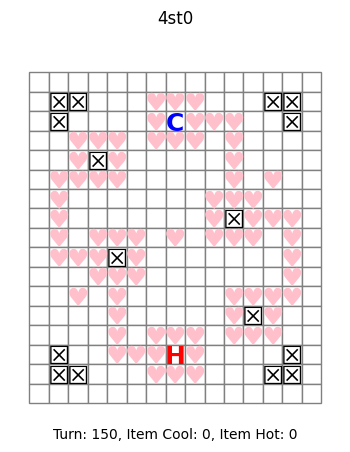

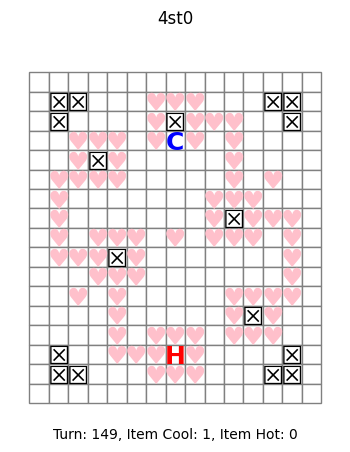

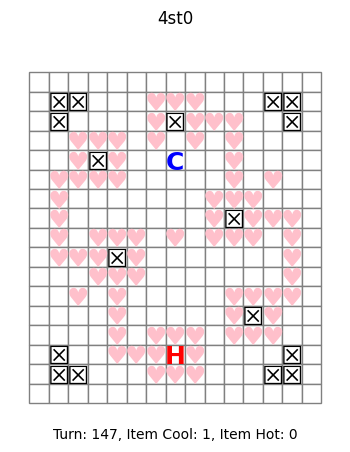

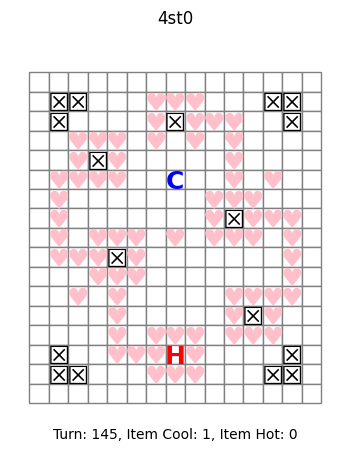

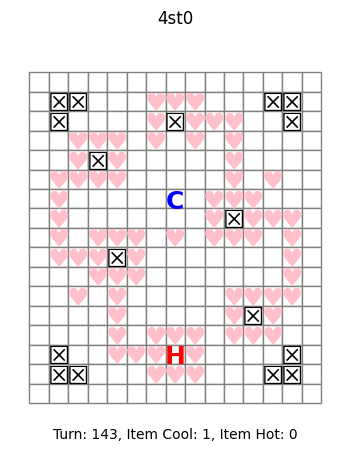

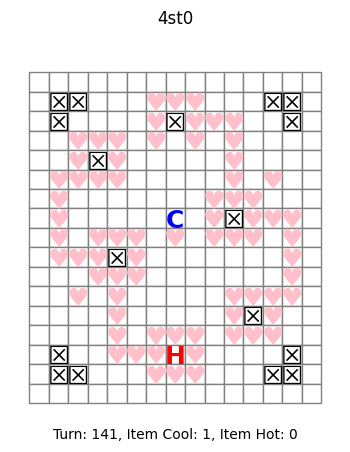

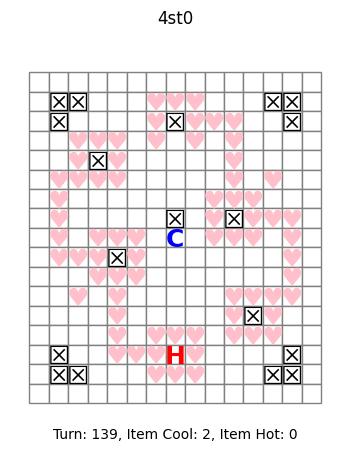

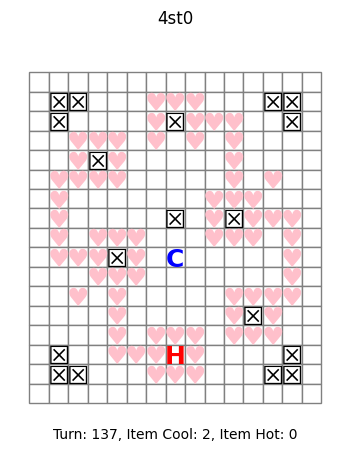

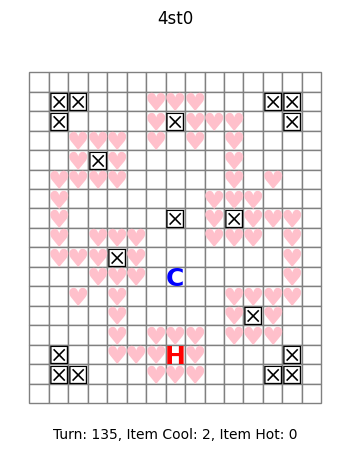

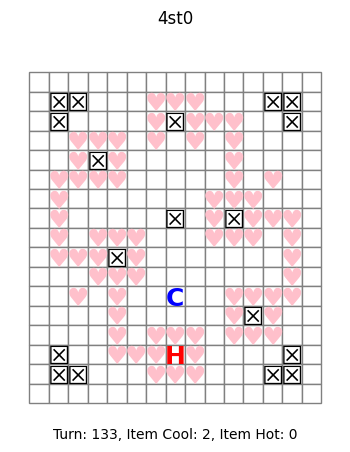

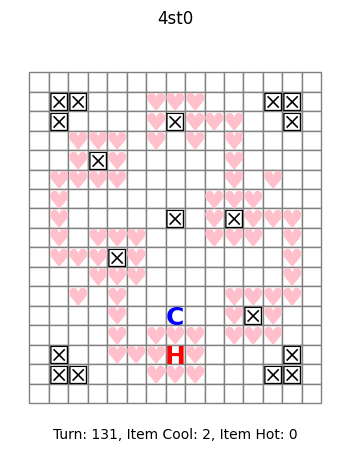

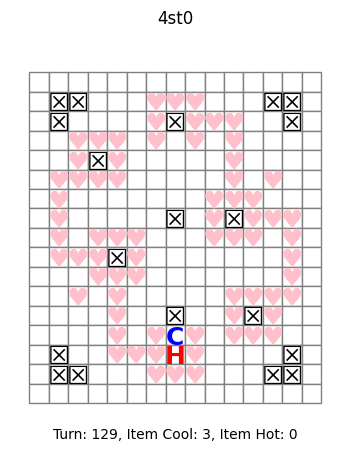

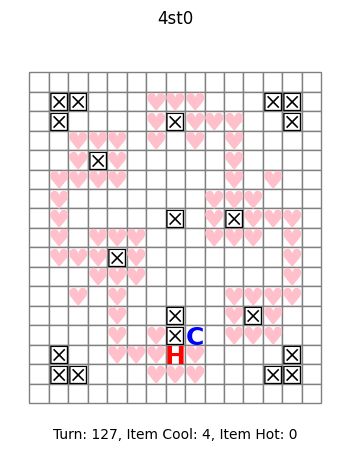

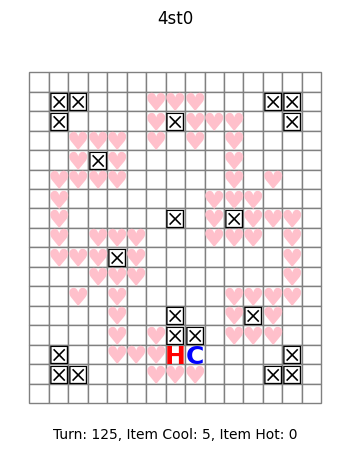

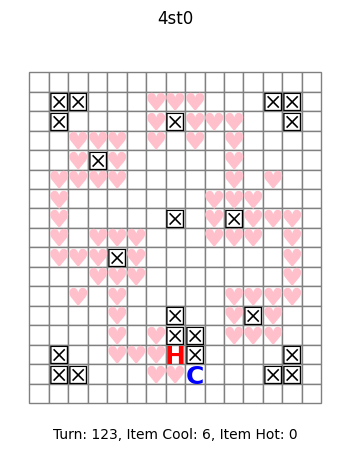

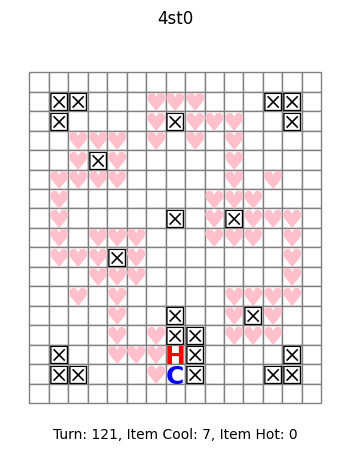

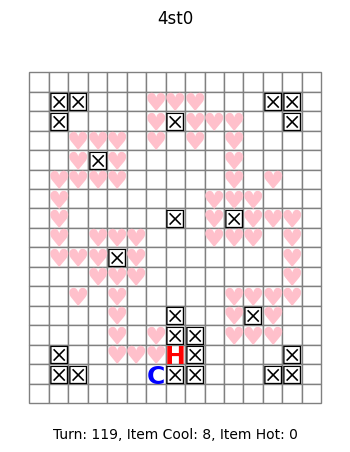

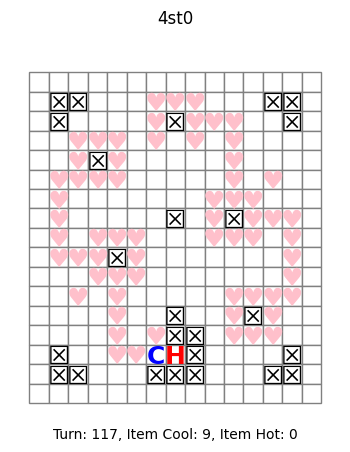

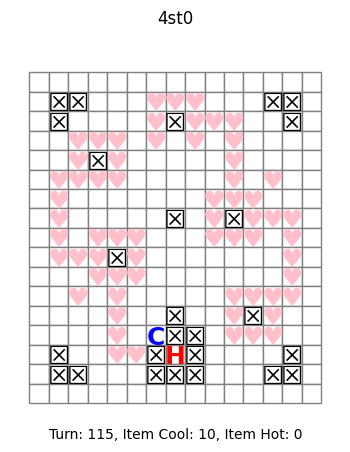

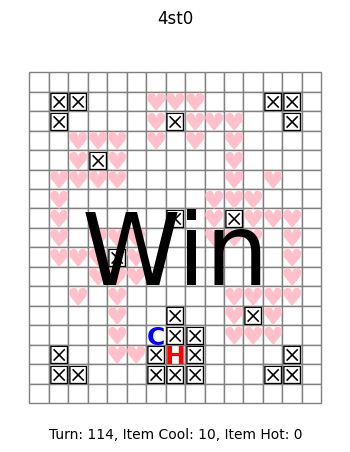

In [28]:
client = Client('2017semiFinal.map')

flag = 0
flag2 = True 

while client.isWorking:
    value = client.get_ready()
    
    if flag < 4:
        value = client.walk_down()
    elif value[6] == 3:
        client.walk_right()
    elif value[8] == 3:
        client.walk_down()
    elif value[2] == 3:
        client.walk_up()
    elif value[4] == 3:
        client.walk_left()
    elif value[8] == 2:
        client.walk_up()
    elif value[9] == 2:
        client.put_down()
    else:
        client.walk_down()

    flag += 1